<h1> Hand Written Digit Prediction

<h3> Creating a model to recognize and classify handwritten digits from a dataset

<h4>Dataset Source:Handwritten digit dataset in scikit-learn

Importing all the library to be used and the dataset needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mat
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier

Loading the dataset in a variable

In [2]:
ld=load_digits()

Visualizing the digits

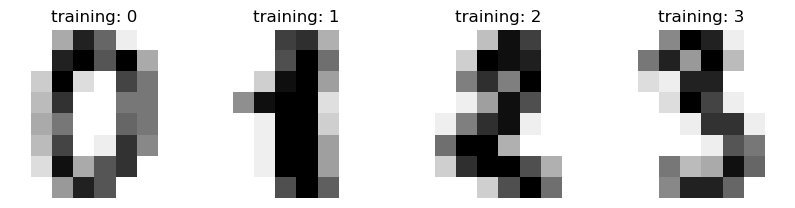

In [3]:
_, axes=mat.subplots(nrows=1, ncols=4, figsize=(10,6))
for ax, image, label in zip(axes, ld.images, ld. target):
  ax.set_axis_off()
  ax.imshow(image, cmap=mat.cm.gray_r, interpolation="nearest")
  ax.set_title("training: %i" % label)

Checking the dimensions of data

In [4]:
ld.images.shape

(1797, 8, 8)

In [5]:
ld.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [6]:
ld.images[0].shape

(8, 8)

Data preparation

In [7]:
n_samples=len(ld.images)
data=ld.images.reshape((n_samples, -1))

In [8]:
data[0,], data[0].shape

(array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]),
 (64,))

In [9]:
data.shape

(1797, 64)

In [10]:
data.min()

0.0

In [11]:
data.max()

16.0

Normalizing the data

In [12]:
data=data/16

In [13]:
data.min()

0.0

In [14]:
data.max()

1.0

In [15]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

Data Splitting

In [16]:
inp_train, inp_test, out_train, out_test= tts(data, ld.target, train_size=0.7)

In [17]:
inp_train.shape, inp_test.shape, out_train.shape, out_test.shape

((1257, 64), (540, 64), (1257,), (540,))

Creating and training Random Forest Model

In [18]:
rc=RandomForestClassifier()

In [19]:
rc.fit(inp_train, out_train)

RandomForestClassifier()

Prediciton

In [20]:
out_pred=rc.predict(inp_test)

Evaluation

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

In [22]:
confusion_matrix(out_test, out_pred)

array([[55,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 59,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 63,  0,  1,  0,  3,  0,  0],
       [ 0,  0,  0,  0, 58,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0, 41,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 54,  0,  1],
       [ 0,  2,  0,  1,  1,  1,  0,  1, 45,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 54]], dtype=int64)

In [23]:
print(classification_report(out_test, out_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        56
           1       0.96      0.98      0.97        52
           2       1.00      1.00      1.00        59
           3       0.98      0.94      0.96        67
           4       0.97      0.98      0.97        59
           5       0.89      0.98      0.93        42
           6       0.98      0.98      0.98        43
           7       0.93      0.98      0.96        55
           8       0.98      0.88      0.93        51
           9       0.96      0.96      0.96        56

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540



This program aims to build a machine learning model to recognize handwritten digits using Random Forest Classifier algorithm. 

<div>
<h4>Working:</h4>
<div>&nbsp
1. The model learns to associate pixel patterns with digit labels during training.
<div>&nbsp
2. It uses this learned knowledge to predict the figit for new, unseen images by analyzing the pixel patterns.
<div>&nbsp
3. Predictions are made using the Random Forest Classfier which is ensemble learning algorithm and relies on a 'majority vote' from multiple decision trees to decide the most likely digit for each image.